In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The following line runs the .show() command at the end of every cell, which displays all images and figures created in it.
%matplotlib inline
path_data = './data/'

In [17]:
# To fix SSL certificate issues
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

In [20]:
batch_size = 4

train = torchvision.datasets.CIFAR10(root=path_data, train=True, download=True, transform=cifar_transform)

# Creates an iterable for training dataset
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2)

test = torchvision.datasets.CIFAR10(root=path_data, train=False, download=True, transform=cifar_transform)

# Creates an iterable for testing dataset
testloader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=2)

classes = train.classes

Files already downloaded and verified
Files already downloaded and verified


(3, 36, 138)


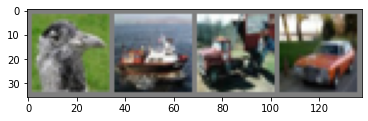

 bird  ship truck automobile


In [21]:
def imshow(img):
    # Normalize image values using predetermined values
    img = img / 2 + 0.5
    # Convert img to numpy array where shape is (C x H x W), which is how PyTorch tensors store image info
    npimg = img.numpy()
    print(npimg.shape)
    # Changes shape to (H x W x C), which is how matplotlib interprets image info and then it displays it using the .imshow function from matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Uses iter to retrieve random image + label from dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Creates a grid of grey borders around the images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
train.numpy().shape

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Ready for Tums!')

[1,  2000] loss: 2.221
[1,  4000] loss: 1.837
[1,  6000] loss: 1.652
[1,  8000] loss: 1.560
[1, 10000] loss: 1.491
[1, 12000] loss: 1.443
[2,  2000] loss: 1.381
[2,  4000] loss: 1.329
[2,  6000] loss: 1.284
[2,  8000] loss: 1.292
[2, 10000] loss: 1.246
[2, 12000] loss: 1.216
Ready for Tums!


In [25]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

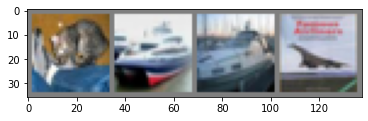

GroundTruth:    cat  ship  ship airplane


In [26]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [28]:
outputs = net(images)

In [29]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship automobile airplane


In [30]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)  
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %
